In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import statsmodels as sm
from pandas_datareader import data as wb

# Some basic useful functions

In [3]:
a = np.array([[0,1,2,3],[4,5,6,7]])
a

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

array() returns a data structure in the Numpy array format. narray must be in the same data type and in the same shape.

In [4]:
a.shape

(2, 4)

Interpretation of 2D array = matrix: similar to a vector. A vector of (3,5) in the x-axis y-axis chart is array([3,5]). 1D array can also be a vector.

In [9]:
series = pd.Series(np.random.random(5), name = 'Column')
series

0    0.222358
1    0.607130
2    0.255155
3    0.785084
4    0.108568
Name: Column, dtype: float64

pd.Series(): used to create a single column of data

## Generating random numbers
use the random model.

random.random(): generate a random float in the range [0,1)

random.randint(): randomizes over a provided interval and delivers an integer value.


In [6]:
probability = random.random()
print (probability)

0.09541531438885675


In [7]:
number = random.randint(1,6)
print(number)

5


The result includes 1 and 6.

In [8]:
np.random.randint(1,6,(4,6))

array([[5, 5, 5, 5, 3, 2],
       [5, 3, 5, 5, 4, 2],
       [5, 4, 1, 3, 5, 2],
       [3, 5, 1, 3, 5, 3]])

random.randint used with numpy --> create a 4 by 6 matrix using number from 1 to 6.

## Importing and organizing data

Use datareader module

In [11]:
PG = wb.DataReader('PG',data_source='yahoo',start='1995-1-1')
PG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.625000,15.437500,15.468750,15.593750,3318400.0,7.820024
1995-01-04,15.656250,15.312500,15.531250,15.468750,2218800.0,7.757337
1995-01-05,15.437500,15.218750,15.375000,15.250000,2319600.0,7.647639
1995-01-06,15.406250,15.156250,15.156250,15.281250,3438000.0,7.663309
1995-01-09,15.406250,15.187500,15.343750,15.218750,1795200.0,7.631965
...,...,...,...,...,...,...
2022-11-14,143.559998,140.259995,140.509995,140.979996,8516200.0,140.979996
2022-11-15,143.199997,139.699997,142.089996,140.490005,7732400.0,140.490005
2022-11-16,142.910004,140.979996,141.500000,141.740005,6193700.0,141.740005


This provide the data package from web. First parameter is the ticker --> The name of the company that has the stock exchange. Second parameter is data source that is yahoo. And the 3rd parameter is which date to start to extract the data.

The adjust close price difference from the starting date to the end date is due to the dividend paying to the stock owners.

In [12]:
PG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7022 entries, 1995-01-03 to 2022-11-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       7022 non-null   float64
 1   Low        7022 non-null   float64
 2   Open       7022 non-null   float64
 3   Close      7022 non-null   float64
 4   Volume     7022 non-null   float64
 5   Adj Close  7022 non-null   float64
dtypes: float64(6)
memory usage: 384.0 KB


In [14]:
#extract the adjust close price for the five companies: P&G, Microsoft, AT&T, Ford, GE
tickers = ['PG','MSFT','T','F','GE']
new_data = pd.DataFrame()
for t in tickers:
    new_data[t] = wb.DataReader(t, data_source='yahoo',start='1995-1-1')['Adj Close']

In [15]:
new_data.head()

,PG,MSFT,T,F,GE
Date,,,,,
1995-01-03,7.820024,2.352808,2.685240,4.220634,32.767982
1995-01-04,7.757338,2.369911,2.678410,4.334194,32.767982
1995-01-05,7.647638,2.330819,2.720258,4.296340,32.848270
1995-01-06,7.663309,2.369911,2.720258,4.296340,32.687656
1995-01-09,7.631964,2.355252,2.711889,4.372047,32.366405


In [2]:
import quandl

quandl provides with economic, financial and alternative datasets. Users can download free data.

In [3]:
mydata_01 = quandl.get('FRED/GDP')

In [4]:
mydata_01.tail(10)

,Value
Date,
2019-07-01,21505.012
2019-10-01,21694.458
2020-01-01,21481.367
2020-04-01,19477.444
2020-07-01,21138.574
2020-10-01,21477.597
2021-01-01,22038.226
2021-04-01,22740.959
2021-07-01,23202.344


In [5]:
#save the data extracted from quandl to local
mydata_01.to_csv('example_01.csv')

To save as excel, use to_excel('')

# Calculating and comparing rates of return in Python

* simple rate of return = $\frac{end price + dividends - beginning price}{beginning price}$

    use when dealing with multiple assets over the same timeframe.

* logarithmic rate of return = $log \frac{end price + dividends - beginning price}{beginning price}$

    use when you make calculations about a single asset over time

* annual return = [(daily return +1)^ 365]*100

In [6]:
PG = wb.DataReader('PG',data_source ='yahoo',start='1995-1-1')

In [7]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,7.820023
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.757339
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.647638
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.663311
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.631969


In [9]:
#calculate simple rate of return
PG['simple_return'] = (PG['Adj Close']/PG['Adj Close'].shift(1))-1
print (PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2022-11-15   -0.003476
2022-11-16    0.008897
2022-11-17   -0.006138
2022-11-18    0.012068
2022-11-21    0.012696
Name: simple_return, Length: 7023, dtype: float64


shift() function helps give the data with n number of lags. In this example, the shift gets the price from previous day.

<AxesSubplot:xlabel='Date'>

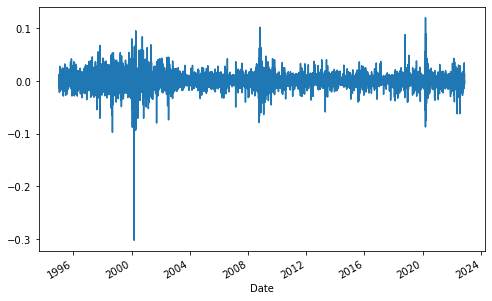

In [11]:
#plot the graph
PG['simple_return'].plot(figsize=(8,5))

In [17]:
#calculate the average daily return
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

0.000515564381349465

In [18]:
#calculate the average annual return. We usually use 250 as the count of total trading day per year
avg_returns_a = PG['simple_return'].mean()*250
avg_returns_a

0.12889109533736623

In [19]:
print(str(round(avg_returns_a, 3)*100)+' %')

12.9 %


In [20]:
#calculate log returns
PG['log_return'] = np.log(PG['Adj Close']/PG['Adj Close'].shift(1))
print (PG['log_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2022-11-15   -0.003482
2022-11-16    0.008858
2022-11-17   -0.006157
2022-11-18    0.011996
2022-11-21    0.012616
Name: log_return, Length: 7023, dtype: float64


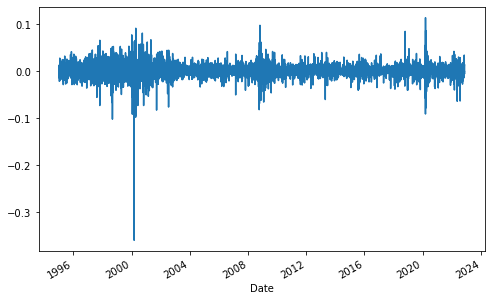

In [21]:
PG['log_return'].plot(figsize=(8,5))
plt.show()

In [23]:
#calculate the average daily log return
log_return_d = PG['log_return'].mean()
log_return_d

0.0004152323046351499

In [25]:
#calculate the average annual log return
log_return_a = PG['log_return'].mean()*250
log_return_a

0.10380807615878748

In [26]:
print (str(round(log_return_a,3)*100)+' %')

10.4 %


## Calculating the return of a portfolio of securities

In [27]:
tickers =['PG','MSFT','F','GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t,data_source='yahoo',start='1995-1-1')['Adj Close']

In [28]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7023 entries, 1995-01-03 to 2022-11-21
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      7023 non-null   float64
 1   MSFT    7023 non-null   float64
 2   F       7023 non-null   float64
 3   GE      7023 non-null   float64
dtypes: float64(4)
memory usage: 274.3 KB


In [29]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.820023,2.352808,4.220634,32.767982
1995-01-04,7.757339,2.369911,4.334195,32.767982
1995-01-05,7.647638,2.330818,4.296342,32.848286
1995-01-06,7.663311,2.369911,4.296342,32.687668
1995-01-09,7.631964,2.355251,4.372047,32.366421


### Normalization to 100
Pt/P0 *100

adjust the price to the first date to make all stock price from different company start at the same level. This is useful to compare the price change regardless of the price value.

In [30]:
mydata.iloc[0]

PG       7.820023
MSFT     2.352808
F        4.220634
GE      32.767982
Name: 1995-01-03 00:00:00, dtype: float64

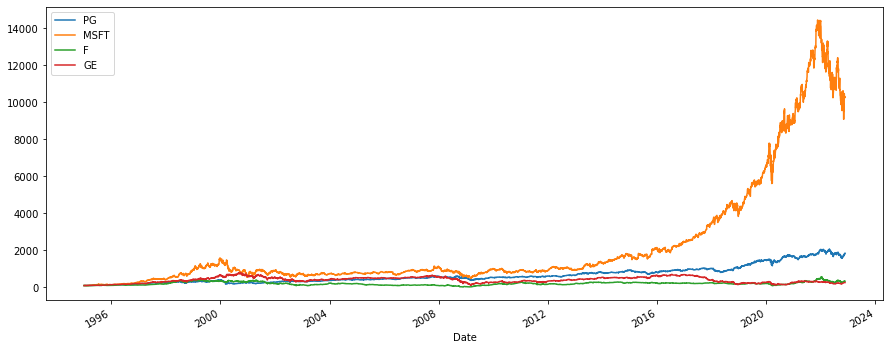

In [31]:
(mydata/mydata.iloc[0]*100).plot(figsize=(15,6))
plt.show()

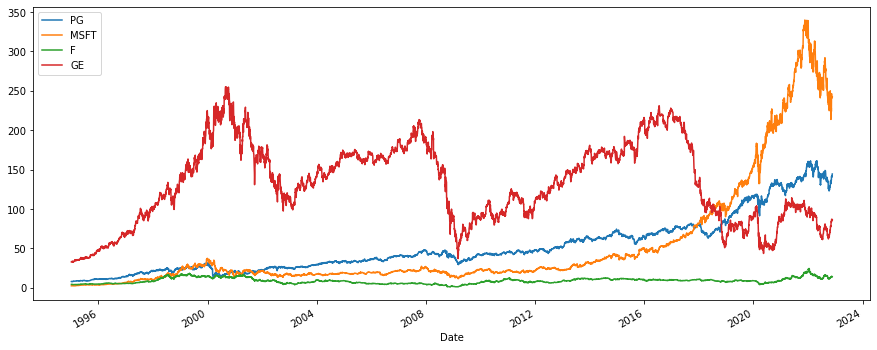

In [33]:
#comparing the graph without normalization
mydata.plot(figsize=(15,6))
plt.show()

In [34]:
#calculte the simple return of these stocks
returns = (mydata/mydata.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016496,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004091,-0.006186,0.017621,-0.009828


In [35]:
#to calculate the return of a portfolio, multiply the weight of each security with the return of that security and sum
weights = np.array([0.25,0.25,0.25,0.25])

In [40]:
#calculate the portfolio return for each day
np.dot(returns,weights)

array([            nan,  6.53989931e-03, -9.22997273e-03, ...,
        3.64961164e-05,  4.24248245e-03,  4.51839118e-03])

np.dot(): calcuates vector or matrix products, the output is the dot product

In [37]:
annual_returns = returns.mean()*250
annual_returns

PG      0.128891
MSFT    0.214405
F       0.123762
GE      0.085983
dtype: float64

In [41]:
#calculate the portfolio return for the entire year
np.dot(annual_returns,weights)

0.13826040723505278

In [39]:
pfolio_1 = str(round(np.dot(annual_returns,weights),3)*100) + ' %'
pfolio_1

'13.8 %'

## Calculating the rate of return of indices

S&P500: GSPC

NASDAQ: IXIC

German DAX: GDAXI

London FTSE: FTSE

In [44]:
tickers = ['^GSPC','^IXIC','^GDAXI']
ind_data = pd.DataFrame()
for t in tickers:
    ind_data[t]=wb.DataReader(t,data_source='yahoo',start='1997-1-1')['Adj Close']

In [45]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
1997-01-02,737.010010,1280.699951,2820.810059
1997-01-03,748.030029,1310.680054,2863.260010
1997-01-06,747.650024,1316.400024,2890.199951
1997-01-07,753.229980,1327.729980,2876.340088
1997-01-08,748.409973,1320.349976,2904.080078


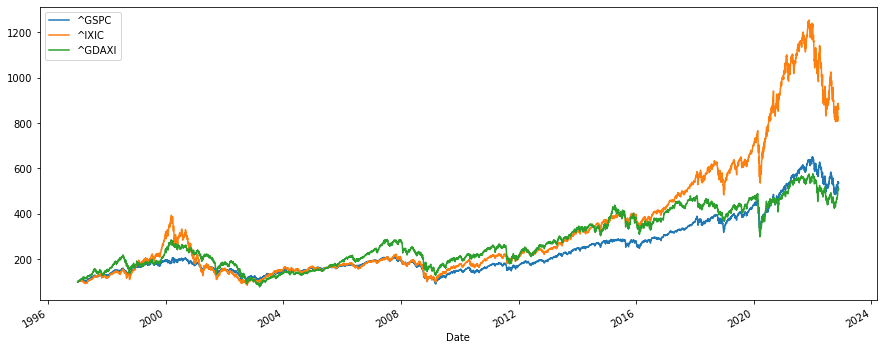

In [46]:
#normalize to 100
(ind_data/ind_data.iloc[0]*100).plot(figsize=(15,6))
plt.show()

In [47]:
#calculate the simple return
ind_returns = (ind_data/ind_data.shift(1)) -1
ind_returns

,^GSPC,^IXIC,^GDAXI
Date,,,
1997-01-02,NaN,NaN,NaN
1997-01-03,0.014952,0.023409,0.015049
1997-01-06,-0.000508,0.004364,0.009409
1997-01-07,0.007463,0.008607,-0.004795
1997-01-08,-0.006399,-0.005558,0.009644
...,...,...,...
2022-11-15,0.008713,0.014486,0.004556
2022-11-16,-0.008252,-0.015385,-0.010048
2022-11-17,-0.003089,-0.003460,0.002273


In [48]:
annual_ind_returns = ind_returns.mean()*250
annual_ind_returns

^GSPC     0.083791
^IXIC     0.114488
^GDAXI    0.075354
dtype: float64